# 第10章 时间序列

In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

In [2]:
%matplotlib inline

## 日期和时间数据类型及工具

In [3]:
from datetime import datetime
now=datetime.now()

In [4]:
now

datetime.datetime(2019, 2, 13, 8, 31, 28, 318421)

In [5]:
now.year,now.month,now.day

(2019, 2, 13)

In [6]:
delta=datetime(2011,1,7)-datetime(2008,6,24,8,15)

In [7]:
delta

datetime.timedelta(926, 56700)

In [8]:
delta.days

926

In [9]:
delta.seconds

56700

In [10]:
from datetime import timedelta

In [11]:
start =datetime(2011,1,7)
start+timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [12]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### 字符串和datetime的相互转换

In [13]:
stamp=datetime(2011,1,3)

In [14]:
str(stamp)

'2011-01-03 00:00:00'

In [15]:
#strftime将日期转化为字符串
stamp.strftime('%Y-%m-%d')

'2011-01-03'

In [16]:
value='2011-01-03'

In [17]:
#strptime将字符串转化为日期
datetime.strptime(value,'%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
datestrs=['7/6/2011','8/6/2011']

In [19]:
[datetime.strptime(x,'%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [20]:
#导入dateutil模块对已有字符串格式的日期进行解析
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [21]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [22]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [23]:
datestrs

['7/6/2011', '8/6/2011']

In [24]:
#to datetime可以解析多张不同的日期形式
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [25]:
#向to_datetime中添加缺失值
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [26]:
idx[2]

NaT

In [27]:
pd.isnull(idx)

array([False, False,  True])

NaT是pandas中时间戳数据的NA值

## 时间序列基础

In [28]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02    1.233422
2011-01-05    0.343296
2011-01-07    0.322317
2011-01-08    0.214465
2011-01-10    0.159871
2011-01-12   -0.488173
dtype: float64

In [29]:
#书上的结果有误，应为：pandas.core.series.Series
type(ts)

pandas.core.series.Series

In [30]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [31]:
ts+ts[::2]

2011-01-02    2.466843
2011-01-05         NaN
2011-01-07    0.644633
2011-01-08         NaN
2011-01-10    0.319742
2011-01-12         NaN
dtype: float64

In [32]:
ts.index.dtype
# note: output changed from dtype('datetime64[ns]') to dtype('<M8[ns]')

dtype('<M8[ns]')

In [33]:
#以纳秒形式存放时间戳
ts.index.dtype

dtype('<M8[ns]')

In [34]:
stamp = ts.index[0]

In [35]:
stamp

Timestamp('2011-01-02 00:00:00')

### 索引、选取、子集构造

In [36]:
stamp = ts.index[2]
ts[stamp]

0.32231668053343016

In [37]:
ts

2011-01-02    1.233422
2011-01-05    0.343296
2011-01-07    0.322317
2011-01-08    0.214465
2011-01-10    0.159871
2011-01-12   -0.488173
dtype: float64

In [38]:
ts['1/10/2011']

0.15987092766460287

In [39]:
ts['20110110']

0.15987092766460287

In [40]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01   -0.691065
2000-01-02   -0.950877
2000-01-03   -0.038378
2000-01-04   -1.173106
2000-01-05    1.365568
2000-01-06    0.270379
                ...   
2002-09-21   -1.684174
2002-09-22    0.304819
2002-09-23   -0.067649
2002-09-24    1.445532
2002-09-25   -0.786872
2002-09-26   -1.274843
Freq: D, Length: 1000, dtype: float64

In [41]:
longer_ts['2001']

2001-01-01    0.101564
2001-01-02   -0.326520
2001-01-03    0.431449
2001-01-04   -1.200501
2001-01-05   -0.188029
2001-01-06    0.087901
                ...   
2001-12-26    0.719805
2001-12-27   -0.914997
2001-12-28   -0.935980
2001-12-29   -0.428344
2001-12-30    0.557166
2001-12-31   -1.217489
Freq: D, Length: 365, dtype: float64

In [42]:
longer_ts['2001-05']

2001-05-01   -0.126489
2001-05-02    1.548445
2001-05-03   -0.855648
2001-05-04    1.011372
2001-05-05   -1.504017
2001-05-06    0.174532
                ...   
2001-05-26    1.198672
2001-05-27   -0.747493
2001-05-28   -0.802366
2001-05-29    0.884059
2001-05-30    1.485266
2001-05-31    1.844891
Freq: D, Length: 31, dtype: float64

In [43]:
ts[datetime(2011, 1, 7):]

2011-01-07    0.322317
2011-01-08    0.214465
2011-01-10    0.159871
2011-01-12   -0.488173
dtype: float64

In [44]:
ts

2011-01-02    1.233422
2011-01-05    0.343296
2011-01-07    0.322317
2011-01-08    0.214465
2011-01-10    0.159871
2011-01-12   -0.488173
dtype: float64

In [45]:
ts['1/6/2011':'1/11/2011']

2011-01-07    0.322317
2011-01-08    0.214465
2011-01-10    0.159871
dtype: float64

In [46]:
ts.truncate(after='1/9/2011')

2011-01-02    1.233422
2011-01-05    0.343296
2011-01-07    0.322317
2011-01-08    0.214465
dtype: float64

In [47]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [48]:
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [49]:
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,2.143977,-2.141339,-0.681143,0.251400
2000-01-12,0.520271,-0.124197,-0.622801,0.773500
2000-01-19,-2.334661,0.107573,-1.390861,-0.303894
2000-01-26,-0.936149,1.381231,-1.392132,0.228638
2000-02-02,-1.180202,0.089844,1.278959,0.793350
2000-02-09,1.700661,-2.067263,-1.722102,1.929998
...,...,...,...,...
2001-10-24,1.305304,0.771912,1.353690,-1.255463
2001-10-31,-0.202508,0.769366,1.519315,-0.258404
2001-11-07,-0.579097,-1.567872,-0.215686,1.861751


In [50]:
#书中的命令为：long_df.ix['5-2001']，其中ix已经不建议使用了，这里用loc
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.651866,-0.505680,-0.115543,-0.041455
2001-05-09,0.249021,-0.564223,1.265671,-0.593207
2001-05-16,0.930430,-0.529945,0.520651,-1.603104
2001-05-23,0.883056,-2.188965,-0.445158,0.490293
2001-05-30,0.057076,-1.164028,1.898560,1.964719


### 带有重复索引的时间序列

In [51]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [52]:
#查看索引的is_unique属性
dup_ts.index.is_unique

False

In [53]:
#查看不重复的索引
dup_ts['1/3/2000'] 

4

In [54]:
#查看重复的索引
dup_ts['1/2/2000'] 

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [55]:
#对具有非唯一时间戳的数据进行聚合
grouped = dup_ts.groupby(level=0)

In [56]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [57]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 日期的范围、频率以及移动

In [58]:
ts

2011-01-02    1.233422
2011-01-05    0.343296
2011-01-07    0.322317
2011-01-08    0.214465
2011-01-10    0.159871
2011-01-12   -0.488173
dtype: float64

In [59]:
#以天为频率进行重采样
ts.resample('D')

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### 生成日期范围

In [60]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [61]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [62]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [63]:
#生成一个由每个月最后一个工作日组成的日期索引，可以传入‘BM’频率（Business end of month）
pd.date_range('1/1/2000', '12/1/2000', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [64]:
#以天为单位，生成5个数据
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [65]:
#虽然已经有了时间，但是想要产生一组被规范化到午夜的时间戳，则可以调用normalize
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 频率和日期偏移量

In [66]:
#以小时或者分钟为基础，加上一个偏移量进行加成
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [67]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [68]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [69]:
#大部分的偏移量都可以直接通过加法进行连接
Hour(2) + Minute(30)

<150 * Minutes>

In [70]:
#传入频率字符串，可以转化为等效的表达式
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates（WOM日期）

In [71]:
#WOM是一种非常实用的频率类，以WOM开头，它使你能获得诸如‘每月第3个星期五’之类的日期
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 移动（超前和滞后）数据

In [72]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.463717
2000-02-29    1.146307
2000-03-31    1.571587
2000-04-30   -0.333945
Freq: M, dtype: float64

In [73]:
#数据列向后移动2位
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.463717
2000-04-30    1.146307
Freq: M, dtype: float64

In [74]:
#数据列向前移动2位
ts.shift(-2)

2000-01-31    1.571587
2000-02-29   -0.333945
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [75]:
ts.shift(1)

2000-01-31         NaN
2000-02-29    0.463717
2000-03-31    1.146307
2000-04-30    1.571587
Freq: M, dtype: float64

In [76]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29    1.471999
2000-03-31    0.371000
2000-04-30   -1.212489
Freq: M, dtype: float64

In [77]:
#加入freq，实现对时间戳进行平移而不改变数值
ts.shift(2, freq='M')

2000-03-31    0.463717
2000-04-30    1.146307
2000-05-31    1.571587
2000-06-30   -0.333945
Freq: M, dtype: float64

In [78]:
ts.shift(3, freq='D')

2000-02-03    0.463717
2000-03-03    1.146307
2000-04-03    1.571587
2000-05-03   -0.333945
dtype: float64

In [79]:
ts.shift(1, freq='3D')

2000-02-03    0.463717
2000-03-03    1.146307
2000-04-03    1.571587
2000-05-03   -0.333945
dtype: float64

In [80]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00    0.463717
2000-02-29 01:30:00    1.146307
2000-03-31 01:30:00    1.571587
2000-04-30 01:30:00   -0.333945
Freq: M, dtype: float64

#### 通过偏移量对日期进行位移

In [81]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [82]:
#偏移到本月的月末
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [83]:
#偏移到下个月的月末
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

In [84]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [85]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [86]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean()

2000-01-31    0.642775
2000-02-29    0.364561
2000-03-31   -0.149157
dtype: float64

In [87]:
#树上的写法ts.resample('M', how='mean')，已经不建议使用了
ts.resample('M').mean()

2000-01-31    0.642775
2000-02-29    0.364561
2000-03-31   -0.149157
Freq: M, dtype: float64

## 时区处理

In [88]:
#导入时区模块，并显示常用时区
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [89]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### 本地化和转化

In [90]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

In [91]:
print(ts.index.tz)

None


In [92]:
#加入时区集
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [93]:
#定义时区为UTC时间
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.290694
2012-03-10 09:30:00+00:00   -0.310132
2012-03-11 09:30:00+00:00   -1.565598
2012-03-12 09:30:00+00:00   -0.023386
2012-03-13 09:30:00+00:00    0.803721
2012-03-14 09:30:00+00:00   -1.038839
Freq: D, dtype: float64

In [94]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [95]:
ts_utc.tz_convert('US/Eastern')

2012-03-09 04:30:00-05:00   -0.290694
2012-03-10 04:30:00-05:00   -0.310132
2012-03-11 05:30:00-04:00   -1.565598
2012-03-12 05:30:00-04:00   -0.023386
2012-03-13 05:30:00-04:00    0.803721
2012-03-14 05:30:00-04:00   -1.038839
Freq: D, dtype: float64

In [96]:
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.290694
2012-03-10 14:30:00+00:00   -0.310132
2012-03-11 13:30:00+00:00   -1.565598
2012-03-12 13:30:00+00:00   -0.023386
2012-03-13 13:30:00+00:00    0.803721
2012-03-14 13:30:00+00:00   -1.038839
Freq: D, dtype: float64

In [97]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.290694
2012-03-10 15:30:00+01:00   -0.310132
2012-03-11 14:30:00+01:00   -1.565598
2012-03-12 14:30:00+01:00   -0.023386
2012-03-13 14:30:00+01:00    0.803721
2012-03-14 14:30:00+01:00   -1.038839
Freq: D, dtype: float64

In [98]:
#定义坐标为上海的时间
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 操作时区意识型Timestamp对象

In [99]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [100]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [101]:
stamp_utc.value

1299902400000000000

In [102]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [103]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [104]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [105]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [106]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 不同时区之间的运算

In [107]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -1.612014
2012-03-08 09:30:00    1.638841
2012-03-09 09:30:00    0.931535
2012-03-12 09:30:00   -1.709042
2012-03-13 09:30:00    1.105975
2012-03-14 09:30:00    1.049434
2012-03-15 09:30:00    1.749306
2012-03-16 09:30:00   -0.588169
2012-03-19 09:30:00    0.462133
2012-03-20 09:30:00    1.518637
Freq: B, dtype: float64

In [108]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 时期及其算术运算

In [109]:
#p代表的是2007年一整年的时间
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [110]:
p + 5

Period('2012', 'A-DEC')

In [111]:
p - 2

Period('2005', 'A-DEC')

In [112]:
pd.Period('2014', freq='A-DEC') - p

7

In [113]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [114]:
Series(np.random.randn(6), index=rng)

2000-01   -1.238663
2000-02    0.982330
2000-03    1.226566
2000-04    0.207417
2000-05    0.601889
2000-06    1.694049
Freq: M, dtype: float64

In [115]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 时期的频率转换

In [116]:
#以12月份为末月的时间周期
p = pd.Period('2007', freq='A-DEC')
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [117]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [118]:
#生成一个以6月为末月的时间周期
p = pd.Period('2007', freq='A-JUN')
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [119]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [120]:
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [121]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.479869
2007    0.483229
2008    1.210883
2009    1.243921
Freq: A-DEC, dtype: float64

In [122]:
ts.asfreq('M', how='start')

2006-01    0.479869
2007-01    0.483229
2008-01    1.210883
2009-01    1.243921
Freq: M, dtype: float64

In [123]:
#以工作日结束，business day
ts.asfreq('B', how='end')

2006-12-29    0.479869
2007-12-31    0.483229
2008-12-31    1.210883
2009-12-31    1.243921
Freq: B, dtype: float64

### 按季度计算的时期频率

In [124]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [125]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [126]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [127]:
#获得该季度倒数第二个工作日下午4点的时间戳
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [128]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

In [129]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [130]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 将Timestamp转换为Period（及其反向过程）

In [131]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31    0.988778
2000-02-29   -0.063244
2000-03-31    0.074855
Freq: M, dtype: float64

In [132]:
pts

2000-01    0.988778
2000-02   -0.063244
2000-03    0.074855
Freq: M, dtype: float64

In [133]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2.to_period('M')

2000-01    0.537202
2000-01    1.190517
2000-01    0.500323
2000-02    0.465522
2000-02   -1.167485
2000-02   -0.662159
Freq: M, dtype: float64

In [134]:
pts = ts.to_period()
pts

2000-01    0.988778
2000-02   -0.063244
2000-03    0.074855
Freq: M, dtype: float64

In [135]:
pts.to_timestamp(how='end')

2000-01-31    0.988778
2000-02-29   -0.063244
2000-03-31    0.074855
Freq: M, dtype: float64

### 通过数组创建PeriodIndex

In [136]:
data = pd.read_csv('ch08/macrodata.csv')
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
        ...  
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [137]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
      ... 
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [138]:
#将两个数组与一个频率合并，生成一个新的DataFrame索引
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [139]:
#更新索引，并查询其中的一个字段
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 重采样及频率转换

pandas中的resample方法是各种频率转换工作的主力函数

In [140]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
ts.resample('M').mean()

2000-01-31    0.139686
2000-02-29    0.117428
2000-03-31    0.184191
2000-04-30    0.300173
Freq: M, dtype: float64

In [141]:
ts.resample('M',kind='period').mean()

2000-01    0.139686
2000-02    0.117428
2000-03    0.184191
2000-04    0.300173
Freq: M, dtype: float64

### 降采样

In [142]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [143]:
ts.resample('5min').sum()
# note: output changed (as the default changed from closed='right', label='right' to closed='left', label='left'

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [144]:
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [145]:
ts.resample('5min', closed='left', label='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [146]:
ts.resample('5min', loffset='-1s').sum()

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int32

#### OHLC重采样

In [147]:
ts.resample('5min').ohlc()
# note: output changed because of changed defaults

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### 通过groupby进行重采样

In [148]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)

In [149]:
ts

2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
2000-01-06     5
              ..
2000-04-04    94
2000-04-05    95
2000-04-06    96
2000-04-07    97
2000-04-08    98
2000-04-09    99
Freq: D, Length: 100, dtype: int32

In [150]:
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [151]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### 升采样和插值

In [152]:
#频率为每周三
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.545547,1.180917,1.284671,1.415362
2000-01-12,-0.454597,-1.073546,-1.455534,-1.200464


In [153]:
df_daily = frame.resample('D')
df_daily

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

In [154]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.545547,1.180917,1.284671,1.415362
2000-01-06,-0.545547,1.180917,1.284671,1.415362
2000-01-07,-0.545547,1.180917,1.284671,1.415362
2000-01-08,-0.545547,1.180917,1.284671,1.415362
2000-01-09,-0.545547,1.180917,1.284671,1.415362
2000-01-10,-0.545547,1.180917,1.284671,1.415362
2000-01-11,-0.545547,1.180917,1.284671,1.415362
2000-01-12,-0.454597,-1.073546,-1.455534,-1.200464


In [155]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.545547,1.180917,1.284671,1.415362
2000-01-06,-0.545547,1.180917,1.284671,1.415362
2000-01-07,-0.545547,1.180917,1.284671,1.415362
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.454597,-1.073546,-1.455534,-1.200464


In [156]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.545547,1.180917,1.284671,1.415362
2000-01-13,-0.454597,-1.073546,-1.455534,-1.200464


### 通过日期进行重采样

In [157]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.274344,-1.976874,-0.846082,-0.579985
2000-02,-1.882376,0.858356,0.035317,-1.159141
2000-03,-0.018185,-1.932970,0.665585,1.202071
2000-04,-0.247516,-0.096181,-0.976866,1.612086
2000-05,0.803744,-1.372887,1.354825,-0.048359


In [158]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.241324,-0.259215,0.028850,0.225224
2001,-0.259003,0.097443,0.300143,-0.267589


In [159]:
# Q-DEC: Quarterly, year ending in December
annual_frame.resample('Q-DEC').ffill()
# note: output changed, default value changed from convention='end' to convention='start' + 'start' changed to span-like
# also the following cells

,Colorado,Texas,New York,Ohio
2000Q1,-0.241324,-0.259215,0.028850,0.225224
2000Q2,-0.241324,-0.259215,0.028850,0.225224
2000Q3,-0.241324,-0.259215,0.028850,0.225224
2000Q4,-0.241324,-0.259215,0.028850,0.225224
2001Q1,-0.259003,0.097443,0.300143,-0.267589
2001Q2,-0.259003,0.097443,0.300143,-0.267589
2001Q3,-0.259003,0.097443,0.300143,-0.267589
2001Q4,-0.259003,0.097443,0.300143,-0.267589


In [160]:
annual_frame.resample('Q-DEC',convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.241324,-0.259215,0.028850,0.225224
2000Q2,-0.241324,-0.259215,0.028850,0.225224
2000Q3,-0.241324,-0.259215,0.028850,0.225224
2000Q4,-0.241324,-0.259215,0.028850,0.225224
2001Q1,-0.259003,0.097443,0.300143,-0.267589
2001Q2,-0.259003,0.097443,0.300143,-0.267589
2001Q3,-0.259003,0.097443,0.300143,-0.267589
2001Q4,-0.259003,0.097443,0.300143,-0.267589


In [161]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.241324,-0.259215,0.028850,0.225224
2001Q1,-0.241324,-0.259215,0.028850,0.225224
2001Q2,-0.241324,-0.259215,0.028850,0.225224
2001Q3,-0.241324,-0.259215,0.028850,0.225224
2001Q4,-0.259003,0.097443,0.300143,-0.267589
2002Q1,-0.259003,0.097443,0.300143,-0.267589
2002Q2,-0.259003,0.097443,0.300143,-0.267589
2002Q3,-0.259003,0.097443,0.300143,-0.267589


## 时间序列绘图

In [162]:
close_px_all = pd.read_csv('ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B', fill_method='ffill')
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


D:\program\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: fill_method is deprecated to .resample()
the new syntax is .resample(...).ffill()
  This is separate from the ipykernel package so we can avoid doing imports until


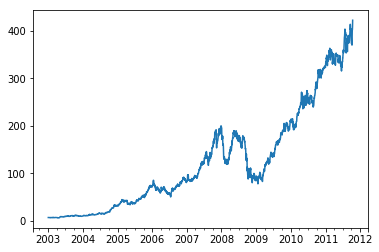

In [163]:
close_px['AAPL'].plot()

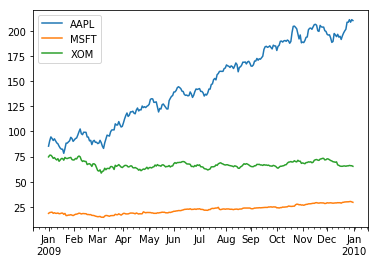

In [164]:
close_px.loc['2009'].plot()

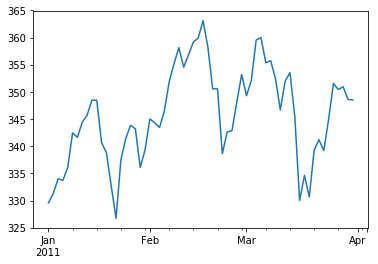

In [165]:
close_px['AAPL'].loc['01-2011':'03-2011'].plot()

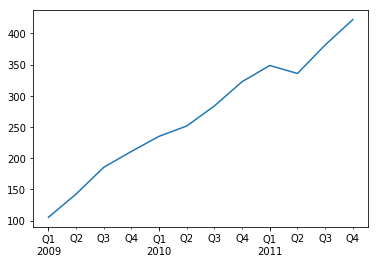

In [166]:
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
appl_q.loc['2009':].plot()

## 移动窗口函数

In [167]:
close_px = close_px.asfreq('B').fillna(method='ffill')

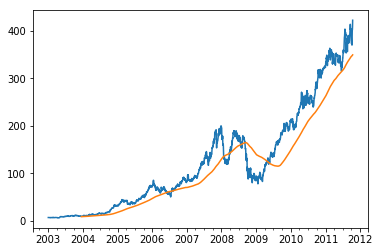

In [168]:
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [169]:
appl_std250=close_px.AAPL.rolling(250,min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

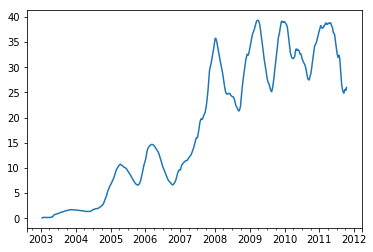

In [170]:
appl_std250.plot()

In [171]:
# Define expanding mean in terms of rolling_mean
expanding_mean = lambda x: rolling_mean(x, len(x), min_periods=1)

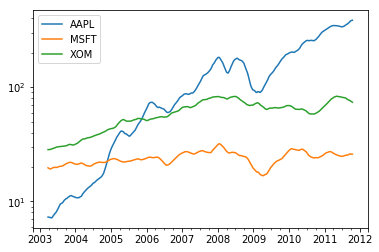

In [172]:
close_px.rolling(60).mean().plot(logy=True)

### 指数加权函数

Text(0.5, 1.0, 'Exponentially-weighted MA')

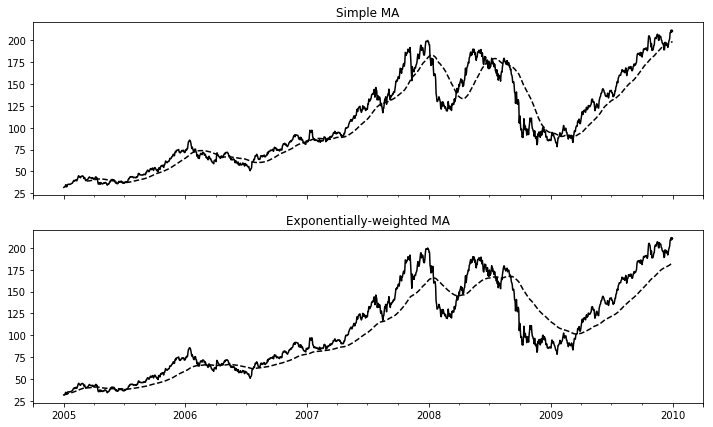

In [178]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

ma60 = aapl_px.rolling(60, min_periods=50).mean()
ewma60 = aapl_px.ewm(60).mean()

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='k--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='k--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### 二元移动窗口函数

In [189]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [190]:
spx_px = close_px_all['SPX']
spx_rets=spx_px.pct_change()
returns=close_px.pct_change()

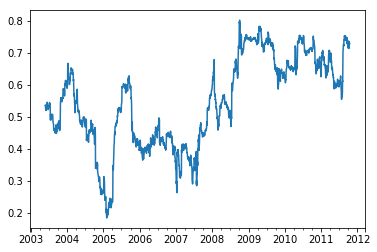

In [191]:
corr=returns.AAPL.rolling(125,min_periods=100).corr(spx_rets)
corr.plot()

In [192]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

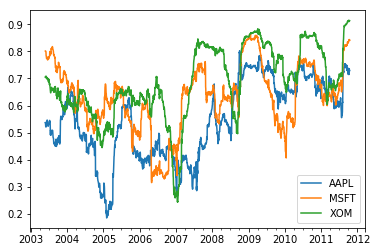

In [194]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### 用户定义的移动窗口函数

D:\program\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until
D:\program\Anaconda\lib\site-packages\scipy\stats\stats.py:1792: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  pct = (np.mean(a_len[idx]) / n) * 100.0


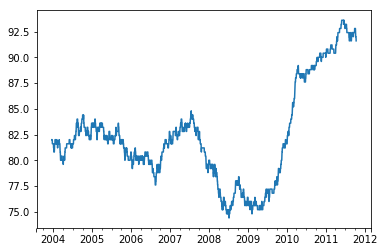

In [196]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()

## 性能和内存方面的注意事项

In [197]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00.000    2.711947
2000-01-01 00:00:00.010   -1.319921
2000-01-01 00:00:00.020   -0.270506
2000-01-01 00:00:00.030   -0.538336
2000-01-01 00:00:00.040   -0.567573
2000-01-01 00:00:00.050    0.634483
                             ...   
2000-01-02 03:46:39.940    0.324503
2000-01-02 03:46:39.950   -0.271467
2000-01-02 03:46:39.960    0.149884
2000-01-02 03:46:39.970    0.318581
2000-01-02 03:46:39.980    1.092687
2000-01-02 03:46:39.990   -0.794166
Freq: 10L, Length: 10000000, dtype: float64

In [199]:
ts.resample('15min').ohlc().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2000-01-01 00:00:00 to 2000-01-02 03:45:00
Freq: 15T
Data columns (total 4 columns):
open     112 non-null float64
high     112 non-null float64
low      112 non-null float64
close    112 non-null float64
dtypes: float64(4)
memory usage: 4.4 KB


In [200]:
%timeit ts.resample('15min').ohlc()

151 ms ± 1.98 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [202]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s').ohlc()

233 ms ± 3.49 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
